In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("World_happiness_index.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df.shape

(158, 12)

In [7]:
# Checking for null values

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [9]:
# using label encoder to convert region column to numerical data

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df[["Region"]] = df[["Region"]].apply(label_encoder.fit_transform)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
# Correlation

df = df[["Region",'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual','Happiness Score']]
df.corr()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Region,1.000000,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276,-0.176791
Standard Error,-0.022600,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.177254
Economy (GDP per Capita),-0.260139,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.780966
Family,-0.168533,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.740605
Health (Life Expectancy),-0.357508,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.724200
Freedom,0.092567,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.568211
Trust (Government Corruption),0.165040,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.395199
Generosity,0.273557,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,0.180319
Dystopia Residual,-0.057276,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.530474
Happiness Score,-0.176791,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,1.000000


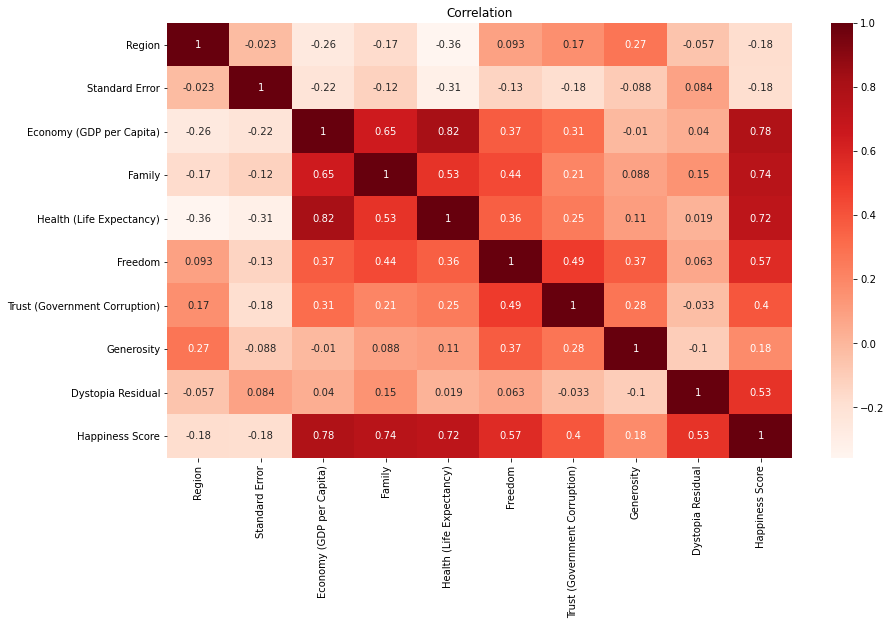

In [11]:
# Visualizing correlation

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Reds')

In [12]:
# the target variable Hapiness score is -vely correlated to Region and Standard error

df.drop("Region",axis=1,inplace=True)
df.drop("Standard Error",axis =1,inplace= True)

In [13]:
df.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


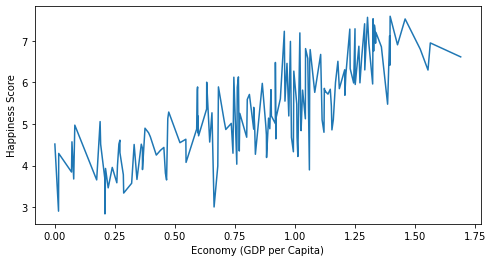

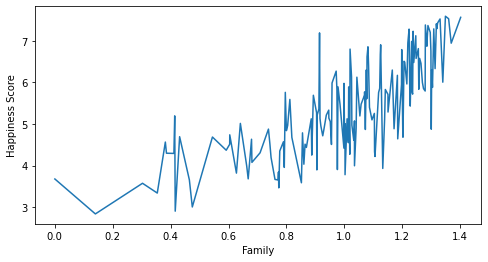

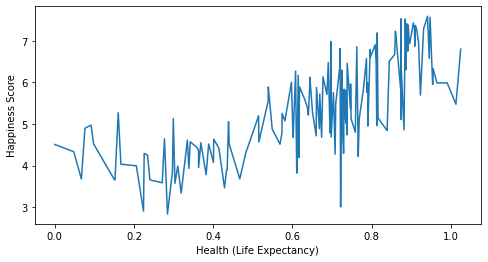

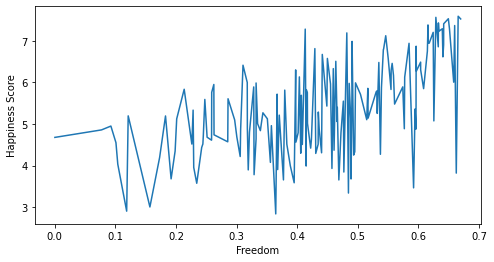

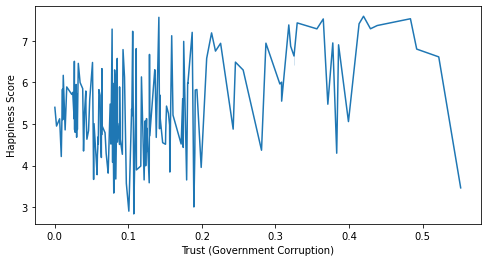

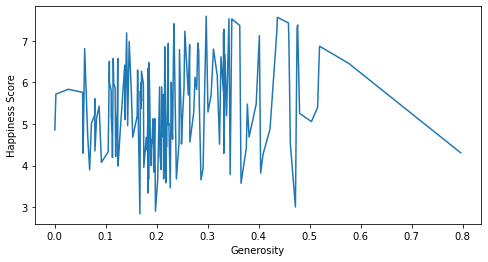

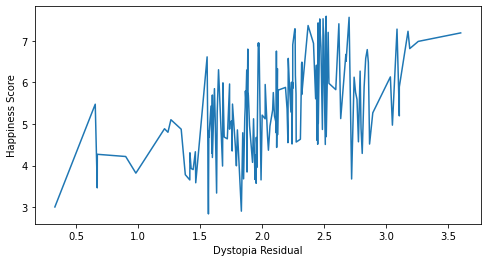

In [14]:
# Looking at lineplots

x = df.drop("Happiness Score",axis=1)

collist = x.columns.values

for i in range(len(collist)):
    plt.figure(figsize=(8,4))
    sns.lineplot(x=df[collist[i]],y = df["Happiness Score"])
    plt.show()
    



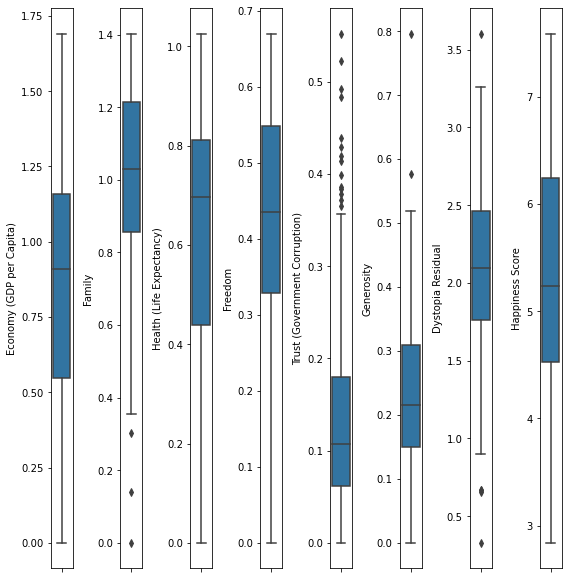

In [15]:
# Checking for outliers using boxplot

collist = df.columns.values
ncol = 8
nrows = 5

plt.figure(figsize=(ncol,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()
    

In [16]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [17]:
df.shape

(158, 8)

In [18]:
df_new.shape

(152, 8)

In [19]:
df = df_new

In [20]:
# Skewness

df.skew()

Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    1.287270
Generosity                       0.646579
Dystopia Residual               -0.045578
Happiness Score                  0.165587
dtype: float64

In [21]:
# Treating skewness

df['Generosity']=np.log1p(df['Generosity'])

a = df[["Trust (Government Corruption)"]].skew()
while a.all()>0.55:
    df["Trust (Government Corruption)"]=np.log1p(df["Trust (Government Corruption)"])
    a = df[["Trust (Government Corruption)"]].skew()

In [22]:
df.skew()

Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    0.000000
Generosity                       0.422071
Dystopia Residual               -0.045578
Happiness Score                  0.165587
dtype: float64

In [23]:
df.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.000022,0.259884,2.51738,7.587
1,1.30232,1.40223,0.94784,0.62877,0.000022,0.362070,2.70201,7.561
2,1.32548,1.36058,0.87464,0.64938,0.000022,0.293706,2.49204,7.527
3,1.45900,1.33095,0.88521,0.66973,0.000022,0.297872,2.46531,7.522
4,1.32629,1.32261,0.90563,0.63297,0.000022,0.377141,2.45176,7.427


In [24]:
# Splitting independent variables and target

x = df.drop('Happiness Score',axis=1)
print(x.head())
y = df[['Happiness Score']]
print("\n")
print(y.head())

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                       0.000022    0.259884            2.51738  
1                       0.000022    0.362070            2.70201  
2                       0.000022    0.293706            2.49204  
3                       0.000022    0.297872            2.46531  
4                       0.000022    0.377141            2.45176  


   Happiness Score
0            7.587
1            7.561
2            7.527
3            7.522
4            7.427


In [25]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6
0,1.381206,1.361736,1.248835,1.586462,0.085811,0.591358,0.747298
1,1.139208,1.572736,1.275116,1.340836,0.084505,1.675834,1.101155
2,1.198712,1.406041,0.974996,1.478400,0.085901,0.950304,0.698732
3,1.541758,1.287453,1.018333,1.614229,0.085709,0.994518,0.647502
4,1.200793,1.254074,1.102055,1.368870,0.085625,1.835776,0.621532


In [26]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [29]:
model = [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print(m, "model")
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print("\n")

LinearRegression() model
0.99285699676731
0.991900521329627
0.00809438028032487


SVR() model
0.9888394615720406
0.9791857016907428
0.020801196304094022


DecisionTreeRegressor() model
1.0
0.7384401620184065
0.2613951935483871


KNeighborsRegressor() model
0.9489441298720888
0.9335489451560893
0.06640922580645149




In [30]:
#cross_val_score

from sklearn.model_selection import cross_val_score

for m in model:
    print("For",m ,cross_val_score(m,x,y,cv=5,scoring = "r2").mean())

For LinearRegression() -96.52149988789856
For SVR() -1.7683632985459803
For DecisionTreeRegressor() -7.166148932769036
For KNeighborsRegressor() -4.6240010892070735


In [31]:
# Lasso Regressor

from sklearn.linear_model import Lasso, Ridge, ElasticNet

Reg = [Lasso(alpha=0.001),Ridge(alpha=0.01),ElasticNet(alpha=0.001)]

for r in Reg:
    r.fit(x_train,y_train)
    print(r, "model")
    print(r.score(x_train,y_train))
    predr=r.predict(x_test)
    print(r2_score(y_test,predr))
    print(mean_squared_error(y_test,predr))
    print("\n")



Lasso(alpha=0.001) model
0.9928538087409183
0.991818159458031
0.008176690307479606


Ridge(alpha=0.01) model
0.9928569938697526
0.9918982444740361
0.008096655702700342


ElasticNet(alpha=0.001) model
0.9928557359923529
0.9918461181506995
0.008148749214008048




In [32]:
for r in Reg:
    print("For",r ,cross_val_score(r,x,y,cv=5,scoring = "r2").mean())

For Lasso(alpha=0.001) 0.7723628050790149
For Ridge(alpha=0.01) -29.99588135122129
For ElasticNet(alpha=0.001) 0.7733125620065147


In [33]:
# saving the model - Elasticnet

import joblib

joblib.dump(ElasticNet(alpha=0.001),"en_world_happiness.pkl")

['en_world_happiness.pkl']